In [31]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, RandomizedSearchCV ,GridSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.metrics import ( accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay) 
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Import Dataset

In [33]:
df = pd.read_csv("Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Exploratory Data Analysis

In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [35]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [36]:
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [37]:
print(df.isnull().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [38]:
sns.set_style("whitegrid")

## Visualize Churn Distribution

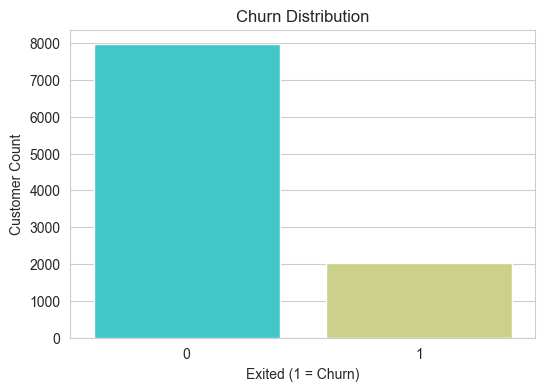

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df,palette="rainbow")
plt.title("Churn Distribution")
plt.xlabel("Exited (1 = Churn)")
plt.ylabel("Customer Count")
plt.show()

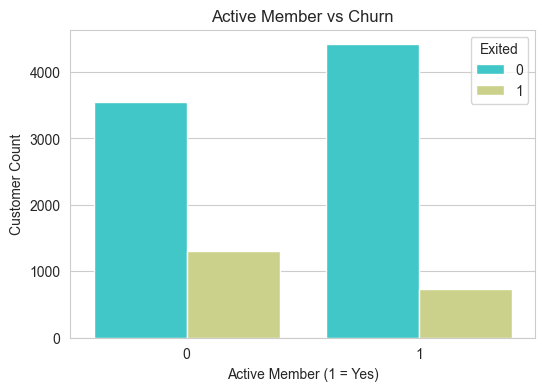

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette="rainbow")

plt.title("Active Member vs Churn")
plt.xlabel("Active Member (1 = Yes)")
plt.ylabel("Customer Count")

plt.show()

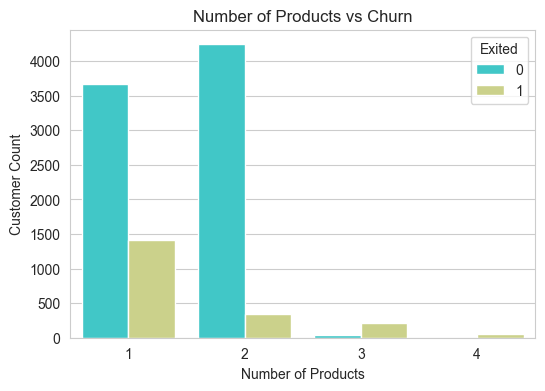

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(x='NumOfProducts', hue='Exited', data=df, palette="rainbow")

plt.title("Number of Products vs Churn")
plt.xlabel("Number of Products")
plt.ylabel("Customer Count")

plt.show()

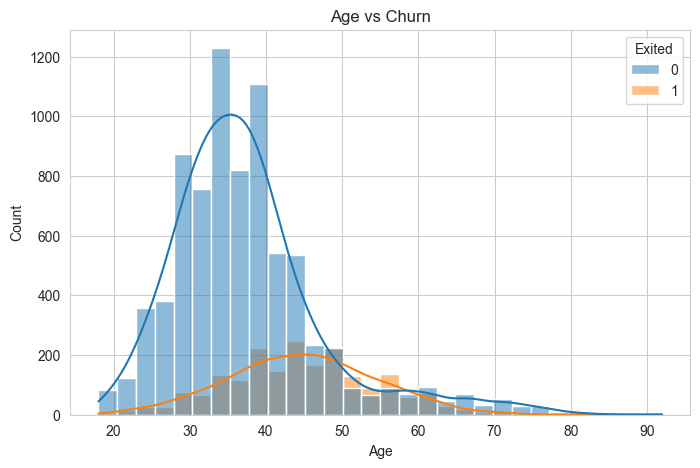

In [42]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Exited', bins=30, kde=True)

plt.title("Age vs Churn")
plt.xlabel("Age")

plt.show()

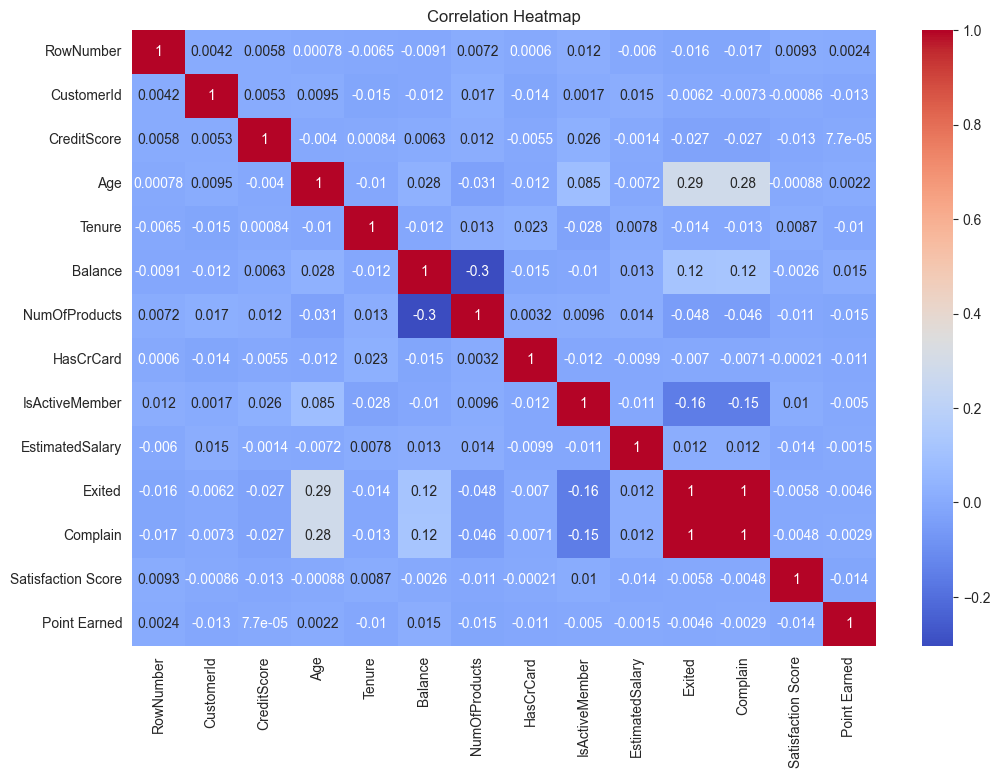

In [43]:
plt.figure(figsize=(12,8))

numeric_df = df.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()

In [44]:
df = df.drop(['RowNumber','CustomerId','Surname','Complain'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


In [46]:
df['EngagementScore'] = (
    df['IsActiveMember'] +
    df['NumOfProducts'] +
    df['HasCrCard']
)

## Split Train and Test Data

In [45]:
target = "Exited"
features = [col for col in df.columns if col != target]
X = df[features]
y = df[target]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.25,
        stratify=y,
        random_state=42
    )

## Split Categoryal and Numeric Columns

In [48]:
categorycal_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num",StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(drop='first'), categorycal_cols)
    ]
)

pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", XGBClassifier(
            objective="binary:logistic",
            eval_metric="auc",
            scale_pos_weight=4,
            n_estimators=500,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.7,
            colsample_bytree=0.7,
            tree_method="hist",
            gamma=0.5,
            min_child_weight=3,
            random_state=42
        ))
    ])

In [49]:
param_dist = {
        "model__max_depth": [3,4],
        "model__learning_rate": [0.05, 0.1],
        "model__subsample": [0.9, 0.8],
        "model__colsample_bytree": [0.8, 0.9],
        "model__n_estimators": [400, 600],
        "model__gamma": [0,0.1], 
        "model__min_child_weight": [3, 5],
        "model__scale_pos_weight": [4]
    }

grid_search = GridSearchCV(
    pipe,
    param_dist,
    cv=4,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 4 folds for each of 128 candidates, totalling 512 fits
{'model__colsample_bytree': 0.8, 'model__gamma': 0, 'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__min_child_weight': 3, 'model__n_estimators': 400, 'model__scale_pos_weight': 4, 'model__subsample': 0.9}


In [50]:
best_params = {
    k.replace("model__", ""): v
    for k, v in grid_search.best_params_.items()
}

In [51]:
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    stratify=y_train,
    random_state=42
)

In [52]:
preprocessor.fit(X_train_final)

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

In [53]:
X_train_proc = preprocessor.transform(X_train_final)
X_val_proc = preprocessor.transform(X_val)
X_test_proc = preprocessor.transform(X_test)

## Fitting Model

In [54]:
final_model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    tree_method="hist",
    random_state=42,
    early_stopping_rounds=30,
    **best_params
)

final_model.fit(
    X_train_proc,
    y_train_final,
    eval_set=[(X_val_proc, y_val)],
    verbose=True
)

[0]	validation_0-auc:0.78832
[1]	validation_0-auc:0.80833
[2]	validation_0-auc:0.80342
[3]	validation_0-auc:0.80824
[4]	validation_0-auc:0.81389
[5]	validation_0-auc:0.83255
[6]	validation_0-auc:0.83620
[7]	validation_0-auc:0.83368
[8]	validation_0-auc:0.83310
[9]	validation_0-auc:0.84030
[10]	validation_0-auc:0.84009
[11]	validation_0-auc:0.84104
[12]	validation_0-auc:0.84449
[13]	validation_0-auc:0.84801
[14]	validation_0-auc:0.84652
[15]	validation_0-auc:0.84979
[16]	validation_0-auc:0.84875
[17]	validation_0-auc:0.85171
[18]	validation_0-auc:0.85160
[19]	validation_0-auc:0.85175
[20]	validation_0-auc:0.85042
[21]	validation_0-auc:0.85014
[22]	validation_0-auc:0.85040
[23]	validation_0-auc:0.85210
[24]	validation_0-auc:0.85346
[25]	validation_0-auc:0.85334
[26]	validation_0-auc:0.85293
[27]	validation_0-auc:0.85269
[28]	validation_0-auc:0.85338
[29]	validation_0-auc:0.85223
[30]	validation_0-auc:0.85173
[31]	validation_0-auc:0.85211
[32]	validation_0-auc:0.85174
[33]	validation_0-au

,objective,'binary:logistic'
,use_label_encoder,False
,base_score,0.5
,booster,'gbtree'
,callbacks,None
,colsample_bylevel,1
,colsample_bynode,1
,colsample_bytree,0.8
,early_stopping_rounds,30
,enable_categorical,False
,eval_metric,'auc'


In [55]:
y_pred = final_model.predict(X_test_proc)
y_proba = final_model.predict_proba(X_test_proc)[:, 1]

metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1": f1_score(y_test, y_pred),
    "ROC_AUC": roc_auc_score(y_test, y_proba)
}

metrics

{'Accuracy': 0.7992,
 'Precision': 0.5045632333767927,
 'Recall': 0.7603143418467584,
 'F1': 0.6065830721003135,
 'ROC_AUC': 0.8766640451777596}

## Classification Report of predictions

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1991
           1       0.50      0.76      0.61       509

    accuracy                           0.80      2500
   macro avg       0.72      0.78      0.74      2500
weighted avg       0.84      0.80      0.81      2500



## Confusion Matrix on basis of Predictions

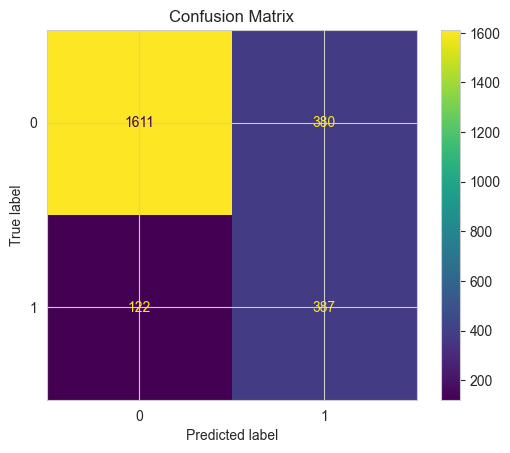

In [57]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

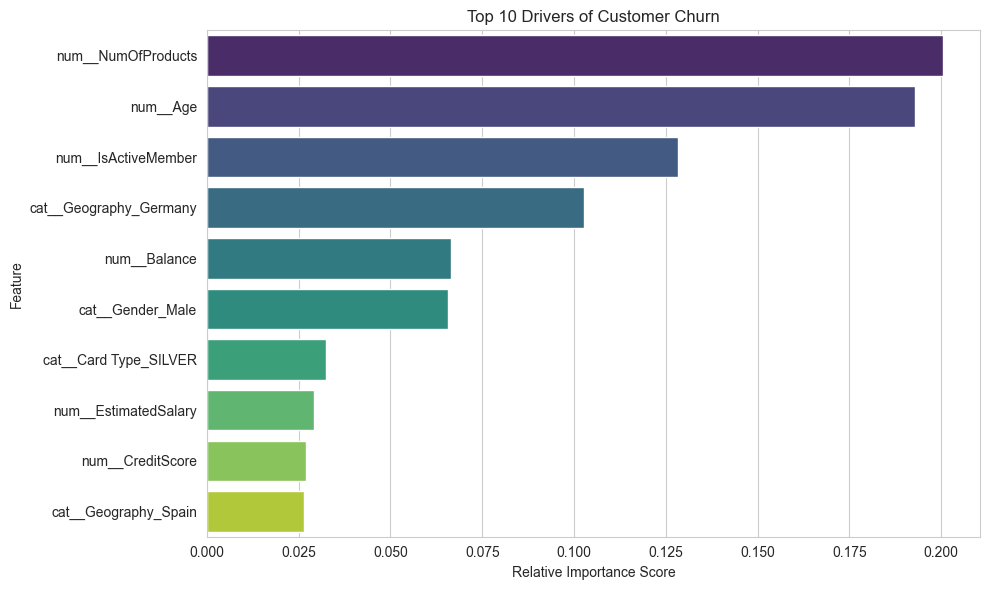

In [58]:
feature_names = preprocessor.get_feature_names_out()
    
    # 2. Get the importance scores
importances = final_model.feature_importances_
    
    # 3. Organize into a DataFrame
feat_df = pd.DataFrame({
   "Feature": feature_names,
    "Importance": importances
    }).sort_values(by="Importance", ascending=False)
    
    # 4. Plot the Top 10
plt.figure(figsize=(10, 6))
    
    # FIXED: Added hue="Feature" and legend=False to remove the warning
sns.barplot(
        data=feat_df.head(10), 
        x="Importance", 
        y="Feature", 
        hue="Feature", 
        palette="viridis", 
        legend=False
    )
    
    # FIXED: Removed the emoji to stop the font error
plt.title("Top 10 Drivers of Customer Churn") 
    
plt.xlabel("Relative Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()